In [1]:
# Import the following libraries
import os
import random
import shutil

import numpy as np
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

In [2]:
#Define the path
train_dir = 'Train'
test_dir = 'Test'

In [3]:
# Import the Path class
from pathlib import Path  

train_dir = Path(train_dir)
test_dir = Path(test_dir)

In [4]:
# Check the train labels
labels = os.listdir(train_dir)
labels

['Bacterial Canker',
 'Anthracnose',
 'Healthy',
 'Powdery Mildew',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Scooty Mould']

In [5]:
import glob

# Check the number of images in the train  folder
number_image_train = len(list(train_dir.glob('*/*.jpg')))
print('Number of Images in Train Folder: ', number_image_train)

Number of Images in Train Folder:  3299


In [6]:
# Check the number of images in the test folder
number_image_test = len(list(test_dir.glob('*/*.jpg')))
print('Number of Images in Test Folder ', number_image_test)

Number of Images in Test Folder  379


In [7]:
# Get a list of subdirectories
subdirectories = os.listdir(train_dir)

# Iterate through the subdirectories
for subdir in subdirectories:
    subdir_path = os.path.join(train_dir, subdir)
    
    if os.path.isdir(subdir_path):
        # List all the image files in the subdirectory (e.g., assuming they have .jpg extension)
        images = [f for f in os.listdir(subdir_path) if f.endswith('.jpg')]
        
        # Print the number of images in each subdirectory of Train
        print(f'Number of images in {subdir}: {len(images)}')

Number of images in Bacterial Canker: 434
Number of images in Anthracnose: 428
Number of images in Healthy: 450
Number of images in Powdery Mildew: 448
Number of images in Cutting Weevil: 220
Number of images in Die Back: 437
Number of images in Gall Midge: 432
Number of images in Scooty Mould: 450


In [8]:
# Get a list of subdirectories
subdirectories = os.listdir(test_dir)

# Iterate through the subdirectories
for subdir in subdirectories:
    subdir_path = os.path.join(test_dir, subdir)
    
    if os.path.isdir(subdir_path):
        # List all the image files in the subdirectory (e.g., assuming they have .jpg extension)
        images = [f for f in os.listdir(subdir_path) if f.endswith('.jpg')]
        
        # Print the number of images in each subdirectory of Test
        print(f'Number of images in {subdir}: {len(images)}')

Number of images in Bacterial Canker: 49
Number of images in Anthracnose: 50
Number of images in Healthy: 50
Number of images in Cutting Weevil: 30
Number of images in Die Back: 50
Number of images in Gall Midge: 50
Number of images in Powdary Mildew: 50
Number of images in Scooty Mould: 50


In [9]:
# Count of images from the Bacterial Canker subfolder. 
bacterial_canker = list(train_dir.glob('Bacterial Canker/*'))
healthy=list(train_dir.glob('Healthy/*'))

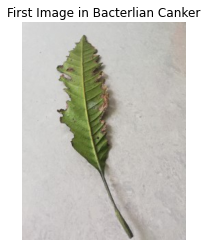

In [10]:
# Plot the first image in the bacterial_canker subfolder,
img=Image.open(bacterial_canker[0])
plt.imshow(img)
plt.axis('off')
plt.title('First Image in Bacterlian Canker')
plt.show()

In [11]:
# Plot the image array for the image
image_array = np.array(img)
h, w, c = image_array.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)

height:  320
width:   240
channel: 3


In [12]:
image_array

array([[[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [172, 163, 154],
        [164, 157, 149],
        [161, 154, 146]],

       [[216, 216, 216],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [174, 165, 156],
        [170, 163, 155],
        [169, 162, 154]],

       [[217, 217, 217],
        [218, 218, 218],
        [219, 219, 219],
        ...,
        [176, 167, 158],
        [174, 167, 159],
        [173, 166, 158]],

       ...,

       [[202, 196, 196],
        [202, 196, 196],
        [203, 197, 197],
        ...,
        [191, 187, 188],
        [183, 179, 180],
        [188, 184, 185]],

       [[203, 197, 197],
        [202, 196, 196],
        [203, 197, 197],
        ...,
        [191, 187, 188],
        [183, 179, 180],
        [184, 180, 181]],

       [[203, 197, 197],
        [202, 196, 196],
        [202, 196, 196],
        ...,
        [192, 188, 189],
        [182, 178, 179],
        [178, 174, 175]]

In [13]:
#flatten the image array


flattened_image = image_array.flatten()
flattened_image

array([216, 216, 216, ..., 178, 174, 175], dtype=uint8)

In [14]:
def plot_rgb_channels(image_array, title):
    # Extract the RGB channels
    red_channel = image_array[:, :, 0].flatten()
    green_channel = image_array[:, :, 1].flatten()
    blue_channel = image_array[:, :, 2].flatten()

    # Create subplots for each channel
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    axes[0].hist(red_channel, bins=256, color='red')
    axes[0].set_title('Red Channel')
    axes[1].hist(green_channel, bins=256, color='green')
    axes[1].set_title('Green Channel')
    axes[2].hist(blue_channel, bins=256, color='blue')
    axes[2].set_title('Blue Channel')

    # Add a big title above the subplots
    fig.suptitle(title, fontsize=16)

    plt.show()

In [15]:
#Open image the healthy leaf
h_img=Image.open(healthy[0])
h_img_array=np.array(h_img)

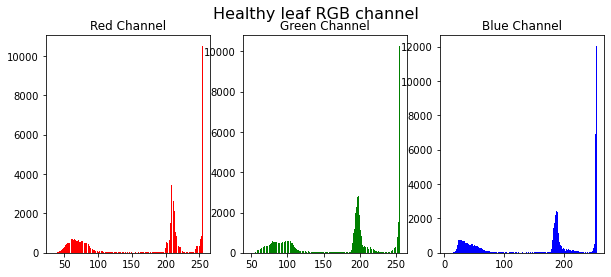

In [16]:
#Plot histogram for healthy leaf
plot_rgb_channels(h_img_array, title='Healthy leaf RGB channel')

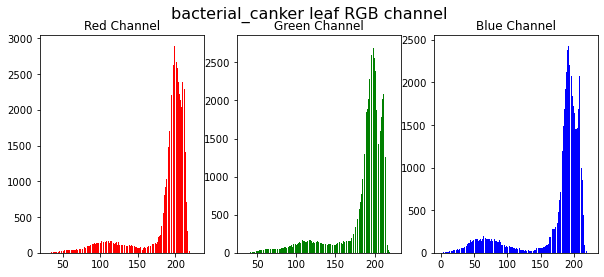

In [17]:
#Plot histogram for  bacterial_canker leaf
plot_rgb_channels(image_array, title='bacterial_canker leaf RGB channel')

### Data Augmentation

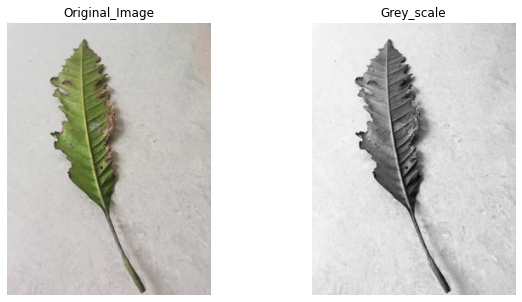

In [18]:
#define the grayscale_image
img = Image.open(bacterial_canker[0])
grayscale_image = img.convert('L')

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original_Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Grey_scale')
ax1.imshow(grayscale_image, cmap = plt.cm.gray)
ax1.axis('off')
plt.show()

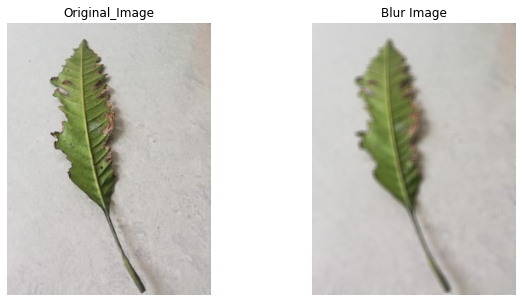

In [19]:
# Apply a blur filter
blur_image = img.filter(ImageFilter.BLUR)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original_Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Blur Image')
ax1.imshow(blur_image)
ax1.axis('off')
plt.show()

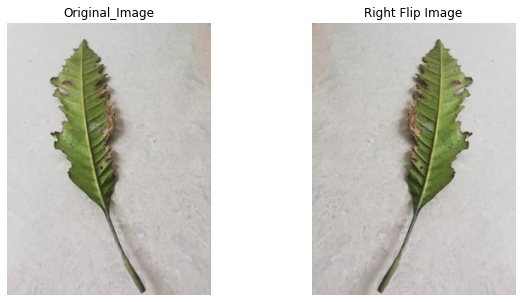

In [20]:
# Flipping images 
flipped_img = np.fliplr(img)
# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original_Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Right Flip Image')
ax1.imshow(flipped_img)
ax1.axis('off')
plt.show()

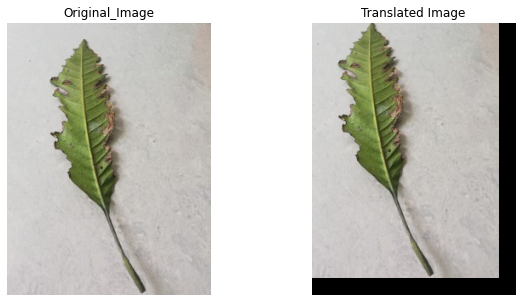

In [21]:
# Translated Image
translated_img = img.transform(img.size,Image.AFFINE,(1, 0, 20, 0, 1, 20))

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original_Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Translated Image')
ax1.imshow(translated_img)
ax1.axis('off')
plt.show()

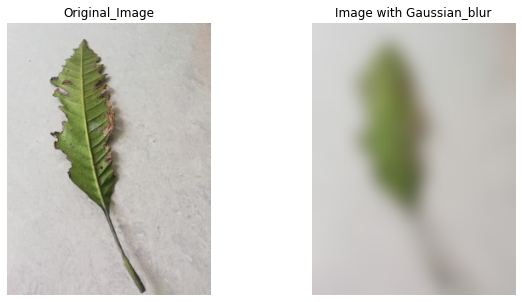

In [22]:
# with Gaussian Blur
img_1 = img.filter(ImageFilter.GaussianBlur(radius=10))

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original_Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Image with Gaussian_blur')
ax1.imshow(img_1)
ax1.axis('off')
plt.show()

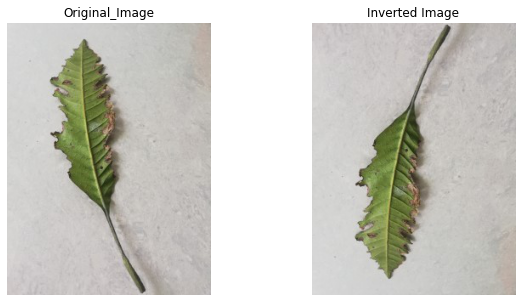

In [23]:
# Complete Flip
inverted_img = img.transpose(Image.FLIP_TOP_BOTTOM)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Original_Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Inverted Image')
ax1.imshow(inverted_img)
ax1.axis('off')
plt.show()

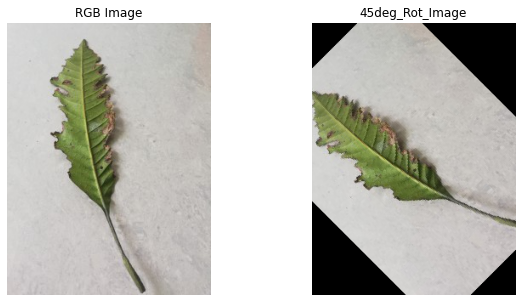

In [24]:
# Rotated Image
rotated_img = img.rotate(45)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('RGB Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('45deg_Rot_Image')
ax1.imshow(rotated_img)
ax1.axis('off')
plt.show()

### Lets do more EDA

In [25]:
# Let us count the number of images in each subdirectory

def count_images_in_categories(directory):
    # List the categories (subfolders) in the specified directory
    categories = os.listdir(directory)

    # Initialize a dictionary to store the image counts for each category
    image_counts = {}

    # Loop through the categories and count the number of images in each category
    for category in categories:
        category_dir = os.path.join(directory, category)

        # Check if the category_dir is a directory
        if os.path.isdir(category_dir):
            # Count the number of files (images) in the category subdirectory
            image_count = len([f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))])
            image_counts[category] = image_count

    return image_counts

In [26]:
count_images_in_categories(train_dir)

{'Bacterial Canker': 434,
 'Anthracnose': 428,
 'Healthy': 450,
 'Powdery Mildew': 448,
 'Cutting Weevil': 220,
 'Die Back': 437,
 'Gall Midge': 432,
 'Scooty Mould': 450}

In [27]:
count_images_in_categories(test_dir)

{'Bacterial Canker': 49,
 'Anthracnose': 50,
 'Healthy': 50,
 'Cutting Weevil': 30,
 'Die Back': 50,
 'Gall Midge': 50,
 'Powdary Mildew': 50,
 'Scooty Mould': 50}

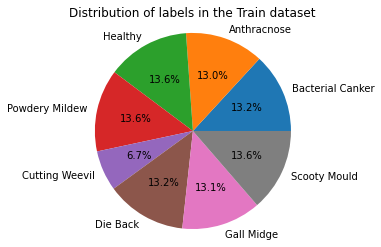

In [28]:
image_counts = list(count_images_in_categories(train_dir).values())
categories = list(count_images_in_categories(train_dir).keys())

# Generate the pie chart
plt.pie(image_counts, labels=categories, autopct='%1.1f%%')

plt.axis('equal') 
plt.title('Distribution of labels in the Train dataset')
plt.show()

#####   As a result, the Train dataset is imbalanced

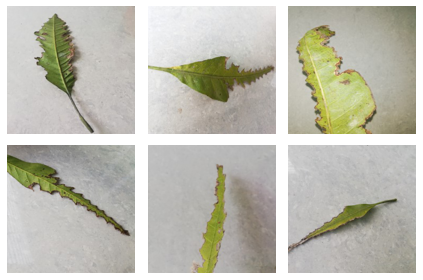

In [29]:
# Plot the first 6 images from the bacterial_canker and resize it 
width=128
height=128

six_images = bacterial_canker[:6]

# Plotting the first four images
fig, axes = plt.subplots(2, 3)

for i, ax in enumerate(axes.flat):
    if i < len(six_images):
        image = Image.open(six_images[i])
        image=image.resize((width, height))# resize the image
        ax.imshow(image)
        ax.axis('off')

plt.tight_layout()
plt.show()

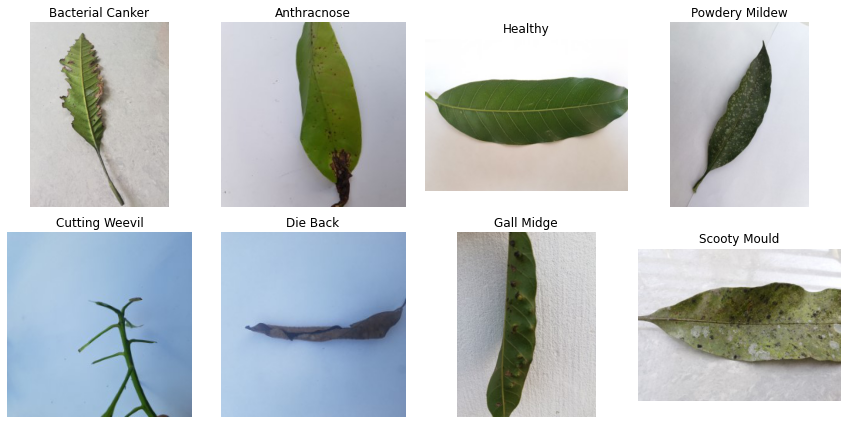

In [30]:
#Plot the first emage from each subdirectories
subdirectories = os.listdir(train_dir)
    
# Define the number of rows and columns for subplots
num_rows = 2  # Adjust as needed
num_cols = 4  # Assuming 8 subdirectories

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through subdirectories and plot the first image from each
for i, subdir in enumerate(subdirectories):
    row = i // num_cols
    col = i % num_cols
    
    subdir_path = os.path.join(train_dir, subdir)
    image_files = [file for file in os.listdir(subdir_path) if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
    
    if image_files:
        first_image_path = os.path.join(subdir_path, image_files[0])
        image = Image.open(first_image_path)
        
        axes[row, col].imshow(image)
        axes[row, col].set_title(subdir)
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## PCA for the bacterial canker data

In [31]:
# Open the first image in the bacterial_canker subdirectory
img = Image.open(bacterial_canker[0])

# Convert the PIL image to a NumPy array
img_array = np.array(img)

# Calculate the sum of color channels along axis=2 to get grayscale image
image_sum = np.sum(img_array, axis=2)
print(image_sum.shape)

# Calculate the maximum value for normalization
max_value = image_sum.max()

# Normalize the image to obtain a binary image
image_bw = image_sum / max_value
print(image_bw.max())

(320, 240)
1.0


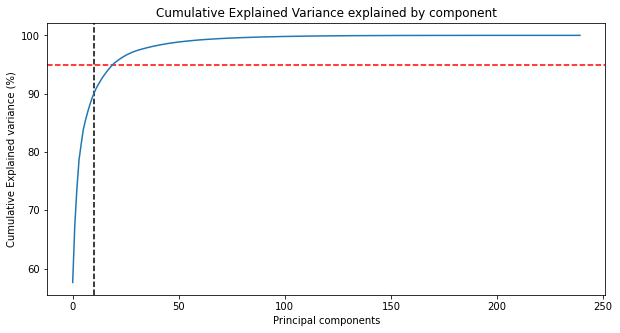

In [32]:
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many Principle Components explain 90% of the variance?
k = np.argmax(var_cumu>90)

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [33]:
print(f'Number of PCA components is : {len(pca.components_)}')

Number of PCA components is : 240


In [34]:
print("Number of components explaining 90% variance: "+ str(k))

Number of components explaining 90% variance: 10


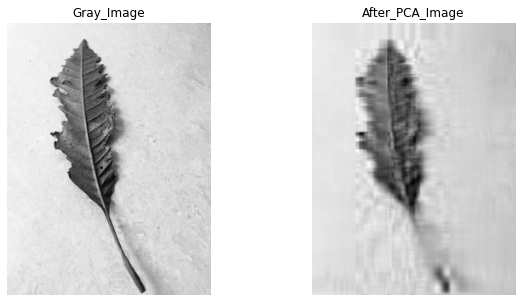

In [35]:
#Let us plot the tranformed Image
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Gray_Image')
ax.imshow(image_bw, plt.cm.gray)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('After_PCA_Image')
ax1.imshow(image_recon, plt.cm.gray)
ax1.axis('off')
plt.show()

#### Notice that  the quality of the image has reduced after PCA.